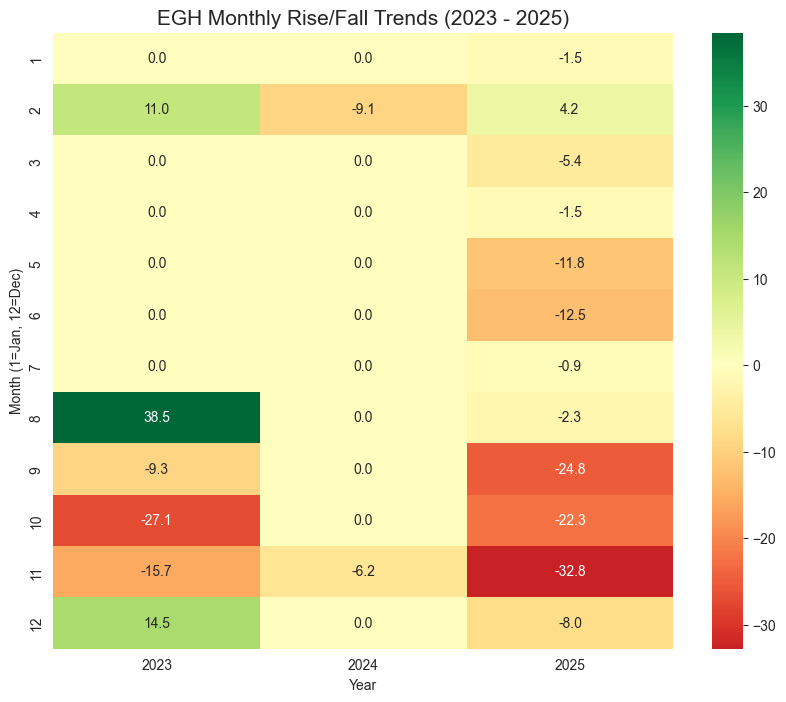

--- Monthly Performance for EGH ---
    Year  Month  Start_Price  End_Price  Monthly_Return_%
0   2023      1         6.64       6.64          0.000000
1   2023      2         5.98       6.64         11.036789
2   2023      3         5.40       5.40          0.000000
3   2023      4         5.40       5.40          0.000000
4   2023      5         5.40       5.40          0.000000
5   2023      6         5.40       5.40          0.000000
6   2023      7         5.40       5.40          0.000000
7   2023      8         3.90       5.40         38.461538
8   2023      9         4.30       3.90         -9.302326
9   2023     10         5.90       4.30        -27.118644
10  2023     11         7.00       5.90        -15.714286
11  2023     12         5.50       6.30         14.545455
12  2024      1         5.50       5.50          0.000000
13  2024      2         6.05       5.50         -9.090909
14  2024      3         6.10       6.10          0.000000
15  2024      4         6.10       6

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and Clean Data
df = pd.read_csv('data/data.csv')
df['Daily Date'] = pd.to_datetime(df['Daily Date'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['Daily Date', 'Share Code'])

# Clean numeric price column
if df['Closing Price - VWAP (GH¢)'].dtype == 'object':
    df['Closing Price - VWAP (GH¢)'] = df['Closing Price - VWAP (GH¢)'].astype(str).str.replace(',', '', regex=False)
    df['Closing Price - VWAP (GH¢)'] = pd.to_numeric(df['Closing Price - VWAP (GH¢)'], errors='coerce')

# 2. Filter for MTNGH and years 2023-2025
# Change 'MTNGH' to any other share code (e.g., 'GCB') to analyze another company
stock_code = 'EGH'
stock_df = df[(df['Share Code'] == stock_code) & (df['Daily Date'].dt.year.isin([2023, 2024, 2025]))].copy()

# Add Year and Month columns for grouping
stock_df['Year'] = stock_df['Daily Date'].dt.year
stock_df['Month'] = stock_df['Daily Date'].dt.month

# 3. Calculate Monthly Performance
# We group by Year and Month, taking the first and last available price of each month
monthly_perf = stock_df.groupby(['Year', 'Month']).agg(
    Start_Price=('Closing Price - VWAP (GH¢)', 'first'),
    End_Price=('Closing Price - VWAP (GH¢)', 'last')
).reset_index()

# Calculate Monthly Return Percentage
monthly_perf['Monthly_Return_%'] = (monthly_perf['End_Price'] - monthly_perf['Start_Price']) / monthly_perf['Start_Price'] * 100

# 4. Create a Pivot Table for the Heatmap
pivot_table = monthly_perf.pivot(index='Month', columns='Year', values='Monthly_Return_%')

# 5. Visualize the "Rise and Fall"
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='RdYlGn', center=0, fmt=".1f")

plt.title(f'{stock_code} Monthly Rise/Fall Trends (2023 - 2025)', fontsize=15)
plt.ylabel('Month (1=Jan, 12=Dec)')
plt.xlabel('Year')
plt.show()

# 6. Print the raw data for specific months
print(f"--- Monthly Performance for {stock_code} ---")
print(monthly_perf)